# Listekomprehension

### Snarvei til å lage lister, set og dictionaries

* Liste:
  ```python
  [ uttrykk for element in samling if betingelse]
  ```
  * Set:
  ```python
  { uttrykk for element in samling if betingelse}
  ```
  * Dictionary:
  ```python
  { utrykk_key: uttrykk_value for element in samling if betingelse }
  ```

Standard måte å lage liste på:

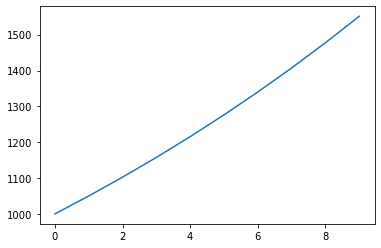

In [1]:
import matplotlib.pyplot as plt
#Plot saldo på sparekonto

def forrentning(P,r,t):
    return P*(1+r)**t

n_tid = 10
start = 1000
rente = 0.05

tid = list(range(n_tid))
saldo = []
for t in tid:
    ny_saldo = forrentning(start, rente, t)
    saldo.append(ny_saldo)
    
plt.plot(tid, saldo)
plt.show()


Med listekomprehensjon

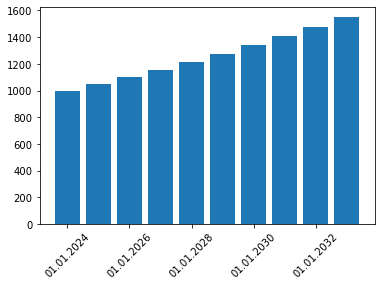

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def forrentning(P,r,t):
    return P*(1+r)**t

n_tid = 10
start = 1000
start_aar = 2024
rente = 0.05

tid = [t for t in range(n_tid)]
saldo = [forrentning(start,rente,t) for t in tid]

akse_labels = [f"01.01.{start_aar+t}" for t in tid if t%2 == 0 ]

plt.bar(tid, saldo)
plt.xticks(ticks=np.arange(0,10,2), labels=akse_labels, rotation=45)
plt.show()


* Ofte er slike listekomprehensjoner lette og lese, skrive og forstå
* Man må passe på ikke ta av -- de kan bli kompliserte og vanskelige å forstå

Man lager `set` på akkura samme måte

In [3]:
import json
with open("kundedata1.json", 'r') as file:
    kundedata = json.load(file)

#Hent alle etternavn
etternavn_alle = { kunde["etternavn"] for kunde in kundedata  }

#Hent alle etternavn som begynner på 'H'
etternavn_H = {kunde["etternavn"] for kunde in kundedata if kunde["etternavn"][0] == 'H'}
print(etternavn_H)


{'Haga', 'Hennøen', 'Hansen', 'Hilling', 'Henriksen', 'Heggen', 'Husøy', 'Hagen', 'Homble', 'Humblen', 'Hofstad', 'Hjelvik', 'Holmeset', 'Høstland', 'Heltne'}


In [4]:

#Kan bli vanskelig å lese eller for komplisert
#Dictionary av alle kunder med etternavn som begynner på 'H'
kunder_H = {etternavn: [kunde for kunde in kundedata if kunde["etternavn"] == etternavn] 
            for etternavn in etternavn_H}

#Vi gjenbruker heller "finnKunde" funksjonen vår fra tidligere
def finnKunde(etternavn):
    treffliste = []
    for kunde in kundedata:
        if etternavn == kunde["etternavn"]:
            treffliste.append(kunde)
    if treffliste == []:
        print(f"Ingen kunder med etternavn '{etternavn}' funndet")
        return None
    else:
        print(f"Vi fant {len(treffliste)} kunder med etternavn '{etternavn}'")
        return treffliste

#Alle kunder med etternavn H
H_klubben = { navn: finnKunde(navn) for navn in etternavn_H}

#Skriv ut til fil
with open("testefil.json", 'w') as file:
    json.dump(H_klubben, file)

Vi fant 28 kunder med etternavn 'Haga'
Vi fant 23 kunder med etternavn 'Hennøen'
Vi fant 23 kunder med etternavn 'Hansen'
Vi fant 22 kunder med etternavn 'Hilling'
Vi fant 13 kunder med etternavn 'Henriksen'
Vi fant 12 kunder med etternavn 'Heggen'
Vi fant 12 kunder med etternavn 'Husøy'
Vi fant 16 kunder med etternavn 'Hagen'
Vi fant 20 kunder med etternavn 'Homble'
Vi fant 24 kunder med etternavn 'Humblen'
Vi fant 17 kunder med etternavn 'Hofstad'
Vi fant 20 kunder med etternavn 'Hjelvik'
Vi fant 19 kunder med etternavn 'Holmeset'
Vi fant 17 kunder med etternavn 'Høstland'
Vi fant 19 kunder med etternavn 'Heltne'


## Oppg:
* Bruk komprehensjon til å lage en dictionary som inneholder allekunder med startsaldo større enn 120,000
* Dictionary skal bestå av nøkler som tilsvarer etternavnet til kundene, og verdiene skal være en liste med kundene på samme format som originalt

In [5]:
grense = 120e3
#lag liste med rike kunder
rike_kunder = [kunde for kunde in kundedata if kunde["startsaldo"] >= grense]
#lag set med etternavnene
etternavn_rikinger = {kunde["etternavn"] for kunde in rike_kunder}

#lag dictionary med kunder { kundensetternavn: [liste med kunder]}
data_rikinger = {navn: [kunde for kunde in rike_kunder if kunde["etternavn"] == navn] 
                 for navn in etternavn_rikinger }

#Alternativt med løkker og if
data_rik = dict() #Lag tom dictionary
for navn in etternavn_rikinger:
    liste_navn = []
    for kunde in rike_kunder:
        if kunde["etternavn"] == navn:
            liste_navn.append(kunde)
    data_rik["navn"] = liste_navn


## Lånekalkulator: Stolpediagram og Kakediagram
* Tidligere lagde vi denne lånekalkulatoren

Hva er ønsket terminbelop? 1000


Gyldig terminbeløp gitt -- kalkulering fortsetter


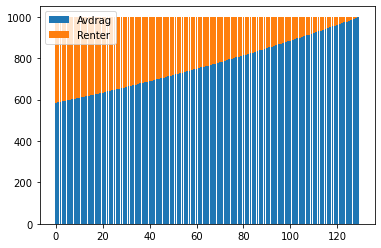

Nedbetalingstiden på 11 år og 10 måneder er for lenge
Renter [4837.334296557354, 4470.878725276828, 4085.6745914802564, 3680.7626831267626, 3255.1347130669888, 2807.730808267409, 2337.436870578584, 1843.081802475325, 1323.4345908604498, 777.2012416704075]


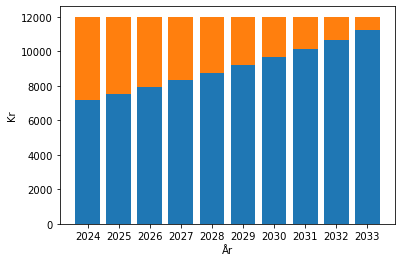

In [6]:
# Annuitetslån
import matplotlib.pyplot as plt

laan = 100000
rentesats = 0.05
terminbelop = float(input("Hva er ønsket terminbelop?"))
max_nedbetalingstid = 10 #år

def sjekk_terminbelop(terminbelop,r,L):
    renter = laan*rentesats/12
    if terminbelop<renter:
        print("Terminbeløpet på", terminbelop, "er for lite")
        print("Første renteavregning er på", renter, "kr")
        return False
    else:
        return True
    
if sjekk_terminbelop(terminbelop, rentesats, laan):
    print("Gyldig terminbeløp gitt -- kalkulering fortsetter")
    avdragsliste = []
    renteliste = []
    mnd = 0
    while laan > 0:
        renter = laan*rentesats/12
        avdrag = terminbelop-renter
        laan = laan - avdrag
        #laan -= termterminbelop
        renteliste.append(renter)
        avdragsliste.append(avdrag)
        mnd += 1
        #mnd = mnd +1

    tid_liste = list(range(mnd))

    plt.bar(tid_liste, avdragsliste, label="Avdrag")
    plt.bar(tid_liste, renteliste, label="Renter", bottom=avdragsliste)
    plt.legend()
    plt.show()
    
    if mnd/12 > max_nedbetalingstid:
        print(f"Nedbetalingstiden på {mnd/12:.0f} år og {mnd%12} måneder er for lenge")
    
    avdrag_aarlig = []
    renter_aarlig = []
    
    n_aar = mnd//12
    aar_liste = list(range(n_aar))
    
    for aar in aar_liste:
        avdrag = avdragsliste[aar*12:(aar+1)*12]
        renter = renteliste[aar*12:(aar+1)*12]
        avdrag_aarlig.append(sum(avdrag))
        renter_aarlig.append(sum(renter))
    
    print("Renter", renter_aarlig)
    
    startaar = 2024
    aarstall_liste = []
    for y in aar_liste:
        aarstall = f"{startaar+y}"
        aarstall_liste.append(aarstall)
        
    plt.bar(aarstall_liste, avdrag_aarlig, label="Avdrag")
    plt.bar(aarstall_liste, renter_aarlig, label="Renter", bottom=avdrag_aarlig)
    plt.xlabel("År")
    plt.ylabel("Kr")
    plt.show()
    
    
else:
    print("Ugyldig terminbeløp gitt -- programmet stopper")






# Oppg: Skriv om lånekalkulator-koden:
* Vi vil dele programmet inn i funksjoner
* Sett sammen programmet på nytt slik at det består av:
  * En funksjon som henter terminbeløp fra bruker
  * En funksjon som sjekker terminbeløp
  * En funksjon som beregner nedbetaling
  * En funksjon som sjekker nedbetalingstiden
  * En funksjon som fremstiller resultat (plotter osv)
  * En funksjon run() som "kjører lånekalkulatoren"

In [43]:
# Annuitetslån
import matplotlib.pyplot as plt
import numpy as np

laan = 100000
rentesats = 0.05
terminbelop = float(input("Hva er ønsket terminbelop?"))
max_nedbetalingstid = 10 #år

def sjekk_terminbelop(terminbelop,r,L):
    renter = L*r/12
    if terminbelop<renter:
        print("Terminbeløpet på", terminbelop, "er for lite")
        print("Første renteavregning er på", renter, "kr")
        return False
    else:
        return True

def lag_nedbetalingsplan(laan, rente, terminbelop):
    avdragsliste = []
    renteliste = []
    mnd = 0
    opprinnelig_laan = laan
    while laan > 0:
        renter = laan*rentesats/12
        avdrag = terminbelop-renter
        laan = laan - avdrag
        renteliste.append(renter)
        avdragsliste.append(avdrag)
        mnd += 1
        #mnd = mnd +1

    avdragsliste[-1] = avdragsliste[-1]+laan
    tids_liste = [m for m in range(mnd)]
    return {"avdrag": avdragsliste, 
            "renter": renteliste, 
            "nedbetalingstid": mnd,
            "laanestorrelse": opprinnelig_laan,
            "terminbelop": terminbelop,
            "rente": rente,
            "termin_liste": tids_liste
           }
def sjekk_nedbetalingstid(nedbetalingstid_mnd, maks_tid_aar):
    if nedbetalingstid_mnd/12 > maks_tid_aar:
        print(f"Nedbetalingstiden på {nedbetalingstid_mnd/12:.0f} år og {nedbetalingstid_mnd%12} måneder er for lenge")
        return False
    else:
        return True

def fremstill_resultat(laanedata):
    avdragsliste = laanedata["avdrag"]
    renteliste = laanedata["renter"]
    tid_liste = laanedata["termin_liste"]
    
    avdrag_pa = []
    renter_pa = []
    
    for y_start in range(0,laanedata["nedbetalingstid"],12):
        avdrag_y =  sum(avdragsliste[y_start:y_start+12])
        renter_y = sum(renteliste[y_start:y_start+12])
        avdrag_pa.append(avdrag_y)
        renter_pa.append(renter_y)


    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    terminer_pa = np.array([ y for y in range(len(avdrag_pa)) ])
    #width = 0.8 som default
    bredde = 1./3
    #plt.bar(terminer_pa-bredde/2, avdrag_pa, width=bredde) #Med numpy
    plt.bar(terminer_pa, avdrag_pa, width=-bredde, align='edge', label="Avdrag p.a.")
    plt.bar(terminer_pa, renter_pa, width=bredde, align='edge', label="Renter p.a.")
    plt.xlabel("År")
    plt.ylabel("Kr")
    plt.legend()
    plt.title("Nedbetaling, Annuitetslån")


    plt.subplot(1,2,1)
    plt.pie([sum(avdragsliste), sum(renteliste)], 
            labels=["Avdrag", "Renter"], 
            autopct='%1.1f%%',
            explode=[0,0.1],
            shadow = True)
    plt.subplots_adjust(left=0, right=1)
    tekst = f"""Andel renter:
    {sum(renteliste)/sum(avdragsliste):.1%}
    """
    box = {"boxstyle": "round", "facecolor": "wheat", "alpha": 0.5}
    plt.text(-1,1,tekst, bbox = box)
    
    plt.show()


def run():
    if not sjekk_terminbelop(terminbelop,rentesats,laan):
        print("Avbryter -- ugyldig terminbeløp")
        return False

    laanedata = lag_nedbetalingsplan(laan, rente, terminbelop)

    if not sjekk_nedbetalingstid(laanedata["nedbetalingstid"], max_nedbetalingstid):
        print("Avbryter -- ugyldig nedbetalingstid")
        return False

    fremstill_resultat(laanedata)
    return True



if run():
    print("Låneberegning vellykket")
else:
    print("Låneberegning mislyktes")

        







Hva er ønsket terminbelop? 400


Terminbeløpet på 400.0 er for lite
Første renteavregning er på 416.6666666666667 kr
Avbryter -- ugyldig terminbeløp
Låneberegning mislyktes
